In [7]:
import os
import sys
sys.path.append('../')

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from matplotlib import cm
from torch_geometric.data import Data, DataLoader

from models.interaction_network import InteractionNetwork
from models.graph import Graph
from models.dataset import GraphDataset

In [8]:
#plt.rc('font', family='dejavuserif', serif='Times')
#plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
plt.rc('mathtext',**{'default':'regular'})
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
#colors = ['#3e5fbf', '#76a2d2', '#a4d5de', '#d2f5e2', '#ffffe0', '#ffaaa2', '#ea6372', '#c32750', '#93003a']

In [28]:
def plot_rz(X, idxs, y, save_fig=False, filename="rz.png"):
    X = np.array(X)
    feats_o = X[idxs[0,:]]
    feats_i = X[idxs[1,:]]
    
    fig = plt.figure(dpi=1000)
    for i in range(len(X)):        
        plt.scatter(X[i][2], X[i][0], c='silver', linewidths=0, marker='s', s=8)

    track_segs_o = feats_o[y>0.5]
    track_segs_i = feats_i[y>0.5]
    for i in range(len(track_segs_o)):
        plt.plot((track_segs_o[i][2], track_segs_i[i][2]),
                 (track_segs_o[i][0], track_segs_i[i][0]),
                  marker='o', ls='-', color='blue', lw=0.25, ms=0.1, alpha=1)

    false_edges_o = feats_o[y<0.5]
    false_edges_i = feats_i[y<0.5]
    for i in range(len(false_edges_o)):
        plt.plot((false_edges_o[i][2], false_edges_i[i][2]),
                 (false_edges_o[i][0], false_edges_i[i][0]),
                  marker='o', ls='-', color='black', lw=0.25, ms=0.1, alpha=0.5)
        
    plt.ylabel("r [m]")
    plt.xlabel("z [m]")
    #plt.legend()
    if (save_fig): plt.savefig(filename, dpi=1200)
    plt.show()

In [22]:
def load_graph(graph_path):
    with np.load(graph_path) as f:
        x = torch.from_numpy(f['x'])
        edge_attr = torch.from_numpy(f['edge_attr'])
        edge_index = torch.from_numpy(f['edge_index'])
        y = torch.from_numpy(f['y'])
        pid = torch.from_numpy(f['pid'])
        data = Data(x=x, edge_index=edge_index,
                    edge_attr=torch.transpose(edge_attr, 0, 1),
                    y=y, pid=pid)
        data.num_nodes = len(x)
    return data


In [29]:
graph = load_graph('output/PU200/0.5GeV/event228_g000.npz')


In [30]:
plot_rz(graph.x, graph.edge_index, graph.y)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd603b7f820> (for post_execute):


KeyboardInterrupt: 

In [28]:
def efficiency(graph): 
    y_list = graph.y.tolist()
    efficiency = np.sum(y_list)/len(y_list)
    return efficiency

In [ ]:
#energies = ['0.5GeV', '0.75GeV', '1GeV', '1.5GeV','2GeV']
energies = ['2GeV']
mean_efficiencies = []
for energy in energies: 
    efficiencies = []
    for filename in os.listdir("output/PU200/"+energy):
        graph = load_graph("output/PU200/" + energy +"/"+filename)
        efficiencies.append(efficiency(graph))
    mean_efficiencies.append(np.mean(efficiencies))
    


In [58]:
mean_efficiencies

[0.8337299280486223]

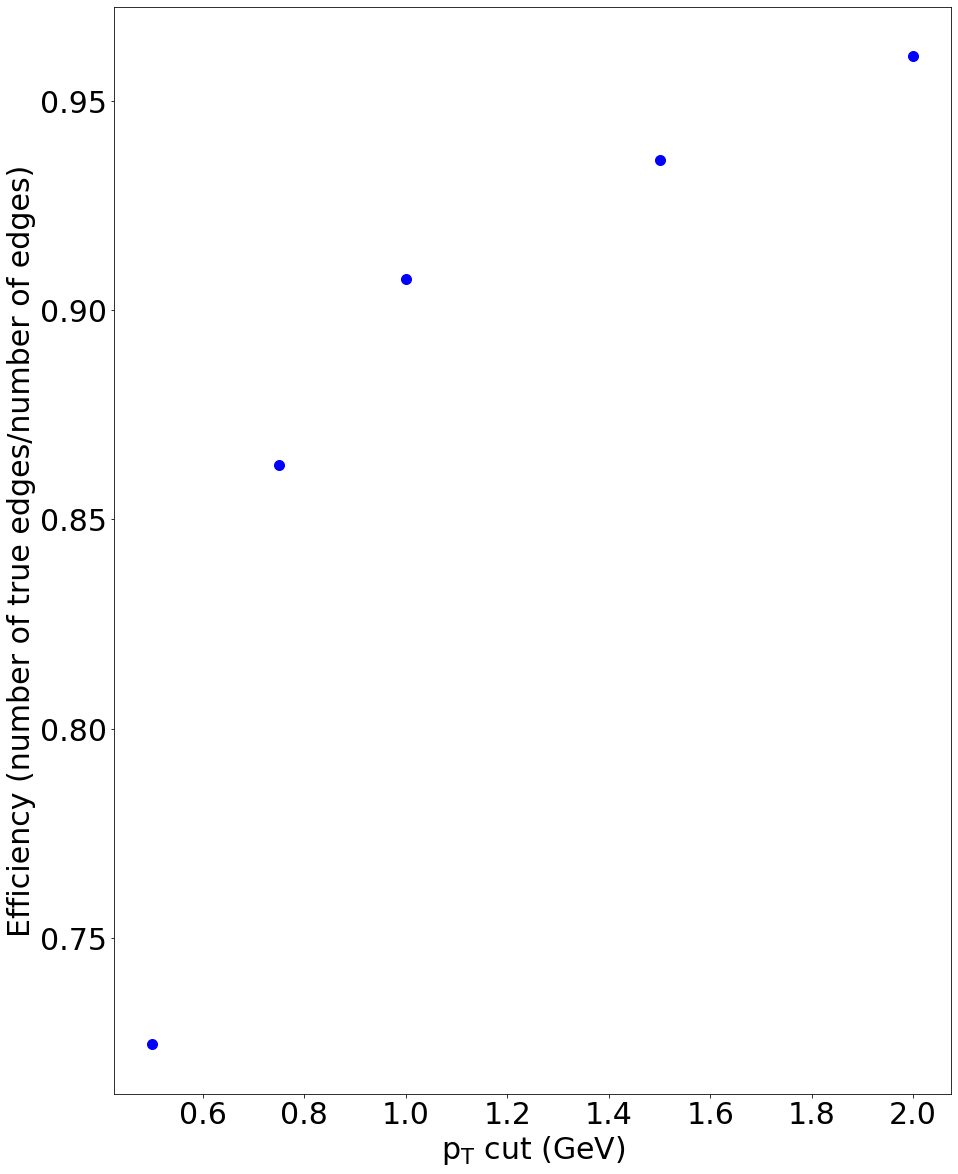

In [92]:
plt.plot([0.5, 0.75, 1,1.5,2], mean_efficiencies, "bo", markersize=10)
plt.xlabel("$p_T$ cut (GeV)")
plt.ylabel("Efficiency (number of true edges/number of edges)")
plt.rcParams['figure.figsize'] = (15, 20)
plt.rcParams.update({'font.size': 30})